<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/Stock_NeurIPS2018_ElegantRL.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

* **Pytorch Version**



# Content

* [1. Task Description](#0)
* [2. Install Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. A List of Python Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download and Preprocess Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5. Build Market Environment in OpenAI Gym-style](#4)  
    * [5.1. Data Split](#4.1)  
    * [5.3. Environment for Training](#4.2)    
* [6. Train DRL Agents](#5)
* [7. Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
  

<a id='0'></a>
# Part 1. Task Discription

We train a DRL agent for stock trading. This task is modeled as a Markov Decision Process (MDP), and the objective function is maximizing (expected) cumulative return.

We specify the state-action-reward as follows:

* **State s**: The state space represents an agent's perception of the market environment. Just like a human trader analyzing various information, here our agent passively observes many features and learns by interacting with the market environment (usually by replaying historical data).

* **Action a**: The action space includes allowed actions that an agent can take at each state. For example, a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying. When an action operates multiple shares, a ∈{−k, ..., −1, 0, 1, ..., k}, e.g.. "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* **Reward function r(s, a, s′)**: Reward is an incentive for an agent to learn a better policy. For example, it can be the change of the portfolio value when taking a at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio values at state s′ and s, respectively


**Market environment**: 30 consituent stocks of Dow Jones Industrial Average (DJIA) index. Accessed at the starting date of the testing period.


The data for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Install Python Packages

<a id='1.1'></a>
## 2.1. Install packages


In [2]:
## install finrl library
!pip install wrds
!pip install swig
!pip install finrl==0.3.5

## instal elegantrl
# !pip install elegantrl==0.3.3

!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Using cached finrl-0.3.5-py3-none-any.whl (85 kB)
INFO: pip is looking at multiple versions of finrl to determine which version is compatible with other requirements. This could take a while.


ERROR: Could not find a version that satisfies the requirement ccxt==1.66.32 (from finrl) (from versions: 1.0.0, 1.0.1, 1.3.1, 1.4.1, 1.5.1, 1.6.1, 1.7.1, 1.8.1, 1.9.1, 1.10.1, 1.11.1, 1.12.1, 1.13.1, 1.14.1, 1.15.1, 1.16.1, 1.17.1, 1.18.1, 1.19.1, 1.20.1, 1.21.1, 1.22.1, 1.23.1, 1.24.1, 1.26.1, 1.27.1, 1.28.1, 1.29.1, 1.30.1, 1.31.1, 1.32.1, 1.33.1, 1.34.1, 1.35.1, 1.36.1, 1.37.1, 1.38.1, 1.39.1, 1.40.1, 1.41.1, 1.42.1, 1.43.1, 1.44.1, 1.45.1, 1.46.1, 1.47.1, 1.48.1, 1.49.1, 1.50.1, 1.51.1, 1.52.1, 1.53.1, 1.54.1, 1.55.1, 1.56.1, 1.57.1, 1.58.1, 1.59.1, 1.60.1, 1.61.1, 1.62.1, 1.63.1, 1.64.1, 1.65.1, 1.66.1, 1.67.1, 1.68.1, 1.69.1, 1.70.1, 1.71.1, 1.72.1, 1.73.1, 1.74.1, 1.75.1, 1.76.1, 1.77.1, 1.78.1, 1.79.1, 1.80.1, 1.81.1, 1.82.1, 1.83.1, 1.84.1, 1.85.1, 1.86.1, 1.87.1, 1.88.1, 1.89.1, 1.90.1, 1.91.1, 1.92.1, 1.93.1, 1.95.1, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.0.10, 2.0.11, 2.0.12, 2.0.13, 2.0.14, 2.0.15, 2.0.16, 2.0.17, 2.0.18, 2.0.19, 2.0.20, 2.0.21, 

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to c:\users\adiln\appdata\local\temp\pip-req-build-0rj_9xf2
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit b8009990dceb15f214ed67458c3f4a41838d2d14
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to c:\users\adiln\appdata\local\temp\pip-install-hasyzwmv\elegantrl_cc4ae99ed3b24562a295174ea236c256
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit b4b9d662b9f9cb7cc368ac2b1036b5119eb20be4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git 'C:\Users\adiln\AppData\Local\Temp\pip-req-build-0rj_9xf2'
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git 'C:\Users\adiln\AppData\Local\Temp\pip-install-hasyzwmv\elegantrl_cc4ae99ed3b24562a295174ea236c256'



<a id='1.2'></a>
## 2.2. A list of Python packages
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
# from finrl.agents.elegantrl.models import DRLAgent
from finrl.agents.stablebaselines3.models import DRLAgent

from stable_baselines3.common.logger import configure
# from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

# from elegantrl.agent import AgentDDPG
# from elegantrl.agent import AgentPPO
# from elegantrl.agent import AgentTD3
# from elegantrl.agent import AgentSAC

import sys
sys.path.append("../FinRL")

import itertools

C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [4]:
from finrl import config_tickers
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TEST_START_DATE,
    TEST_END_DATE
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])



<a id='2'></a>
# Part 3. Download Data
Yahoo Finance provides stock data, financial news, financial reports, etc. Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** in FinRL-Meta to fetch data via Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).



-----
class YahooDownloader:
    Retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()


In [7]:
df = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2021-10-31',
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (94331, 8)


In [8]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [9]:
df.shape

(94331, 8)

In [10]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.747391,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,42.737896,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.144926,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941082,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,31.093405,7117200,CAT,4


# Part 4: Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.
* **Adding technical indicators**. In practical trading, various information needs to be taken into account, such as historical prices, current holding shares, technical indicators, etc. Here, we demonstrate two trend-following technical indicators: MACD and RSI.
* **Adding turbulence index**. Risk-aversion reflects whether an investor prefers to protect the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the turbulence index that measures extreme fluctuation of asset price.

In [11]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators


[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (3229, 8)
Successfully added vix
Successfully added turbulence index


In [12]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [13]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.747391,746015200.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,2.747391,2.747391,39.189999,0.0
1,2009-01-02,AMGN,58.590000,59.080002,57.750000,42.737896,6547900.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,42.737896,42.737896,39.189999,0.0
2,2009-01-02,AXP,18.570000,19.520000,18.400000,15.144926,10955700.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,15.144926,15.144926,39.189999,0.0
3,2009-01-02,BA,42.799999,45.560001,42.779999,33.941082,7010200.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,33.941082,33.941082,39.189999,0.0
4,2009-01-02,CAT,44.910000,46.980000,44.709999,31.093405,7117200.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,31.093405,31.093405,39.189999,0.0
5,2009-01-02,CRM,8.025000,8.550000,7.912500,8.505000,4069200.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,8.505000,8.505000,39.189999,0.0
6,2009-01-02,CSCO,16.410000,17.000000,16.250000,11.595377,40980600.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,11.595377,11.595377,39.189999,0.0
7,2009-01-02,CVX,74.230003,77.300003,73.580002,42.397465,13695900.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,42.397465,42.397465,39.189999,0.0
8,2009-01-02,DIS,22.760000,24.030001,22.500000,20.530582,9796600.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,20.530582,20.530582,39.189999,0.0
9,2009-01-02,GS,84.019997,87.620003,82.190002,67.604958,14088500.0,4.0,0.0,2.969343,2.641388,100.0,66.666667,100.0,67.604958,67.604958,39.189999,0.0


<a id='4'></a>
# Part 5. Build A Market Environment in OpenAI Gym-style
The training process involves observing stock price change, taking an action and reward's calculation. By interacting with the market environment, the agent will eventually derive a trading strategy that may maximize (expected) rewards.

Our market environment, based on OpenAI Gym, simulates stock markets with historical market data.

## Data Split
We split the data into training set and testing set as follows:

Training data period: 2009-01-01 to 2020-07-01

Trading data period: 2020-07-01 to 2021-10-31


In [14]:
train = data_split(processed_full, '2009-01-01','2020-07-01')
trade = data_split(processed_full, '2020-07-01','2021-10-31')
print(len(train))
print(len(trade))



83897
9744


In [15]:
train

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.747391,746015200.0,4.0,0.000000,2.969343,2.641388,100.000000,66.666667,100.000000,2.747391,2.747391,39.189999,0.000000
0,2009-01-02,AMGN,58.590000,59.080002,57.750000,42.737896,6547900.0,4.0,0.000000,2.969343,2.641388,100.000000,66.666667,100.000000,42.737896,42.737896,39.189999,0.000000
0,2009-01-02,AXP,18.570000,19.520000,18.400000,15.144926,10955700.0,4.0,0.000000,2.969343,2.641388,100.000000,66.666667,100.000000,15.144926,15.144926,39.189999,0.000000
0,2009-01-02,BA,42.799999,45.560001,42.779999,33.941082,7010200.0,4.0,0.000000,2.969343,2.641388,100.000000,66.666667,100.000000,33.941082,33.941082,39.189999,0.000000
0,2009-01-02,CAT,44.910000,46.980000,44.709999,31.093405,7117200.0,4.0,0.000000,2.969343,2.641388,100.000000,66.666667,100.000000,31.093405,31.093405,39.189999,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,2020-06-30,UNH,288.570007,296.450012,287.660004,280.751953,2932900.0,1.0,-0.019005,296.506849,264.629806,52.413044,-26.031288,1.846804,280.989902,274.142000,30.430000,12.918919
2892,2020-06-30,V,191.490005,193.750000,190.160004,188.478638,9040100.0,1.0,1.036366,196.397062,182.850245,53.021026,-51.665639,2.013358,189.217595,179.526373,30.430000,12.918919
2892,2020-06-30,VZ,54.919998,55.290001,54.360001,44.822731,17414800.0,1.0,-0.388919,47.973947,43.356947,48.097020,-51.451411,8.508886,45.388065,45.790727,30.430000,12.918919
2892,2020-06-30,WBA,42.119999,42.580002,41.759998,35.569759,4782100.0,1.0,-0.076529,38.826036,33.247417,48.830182,-14.771818,1.500723,35.660386,35.478088,30.430000,12.918919


In [16]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [17]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 291


In [18]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)


## Environment for Training



In [19]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Agent 1: A2C


In [21]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

tmp_path = RESULTS_DIR + '/a2c'
new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


Logging to results/a2c


In [22]:
trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='a2c',
                             total_timesteps=50000) 

--------------------------------------
| time/                 |            |
|    fps                | 118        |
|    iterations         | 100        |
|    time_elapsed       | 4          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -41.2      |
|    explained_variance | -0.266     |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | -25        |
|    reward             | 0.19922899 |
|    std                | 1          |
|    value_loss         | 0.548      |
--------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 118        |
|    iterations         | 200        |
|    time_elapsed       | 8          |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -41.2      |
|    explained_variance | 0.0354     |
|    learning_rate      |

### Agent 2: DDPG

In [23]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

# set up logger
tmp_path = RESULTS_DIR + '/ddpg'
new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg


In [24]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000)

day: 2892, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 6151498.23
total_reward: 5151498.23
total_cost: 4959.26
total_trades: 48440
Sharpe: 1.022
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 50        |
|    time_elapsed    | 229       |
|    total_timesteps | 11572     |
| train/             |           |
|    actor_loss      | -23.9     |
|    critic_loss     | 24.9      |
|    learning_rate   | 0.001     |
|    n_updates       | 8679      |
|    reward          | 4.5766034 |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 46        |
|    time_elapsed    | 497       |
|    total_timesteps | 23144     |
| train/             |           |
|    actor_loss      | -16.2     |
|    critic_loss     | 9.3       |
|    learning_rate   | 0.001     |
|    n_updates       | 20251     |


### Agent 3: PPO

In [25]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

# set up logger
tmp_path = RESULTS_DIR + '/a2c'
new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/a2c


In [26]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=50000)

-----------------------------------
| time/              |            |
|    fps             | 169        |
|    iterations      | 1          |
|    time_elapsed    | 12         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 0.18189228 |
-----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 168         |
|    iterations           | 2           |
|    time_elapsed         | 24          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016842153 |
|    clip_fraction        | 0.222       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.1       |
|    explained_variance   | 0.0127      |
|    learning_rate        | 0.00025     |
|    loss                 | 5.74        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0193     |
|   

## In-sample Performance

Assume that the initial capital is $1,000,000.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [27]:
data_risk_indicator = processed_full[(processed_full.date<'2020-07-01') & (processed_full.date>='2009-01-01')]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [28]:
insample_risk_indicator.vix.describe()

count    2893.000000
mean       18.824245
std         8.489311
min         9.140000
25%        13.330000
50%        16.139999
75%        21.309999
max        82.690002
Name: vix, dtype: float64

In [29]:
insample_risk_indicator.vix.quantile(0.996)

57.40400183105453

In [30]:
insample_risk_indicator.turbulence.describe()

count    2893.000000
mean       34.567960
std        43.790825
min         0.000000
25%        14.962419
50%        24.124126
75%        39.162363
max       652.507589
Name: turbulence, dtype: float64

In [31]:
insample_risk_indicator.turbulence.quantile(0.996)

276.45025701655044

### Trading (Out-of-sample Performance)

We update periodically in order to take full advantage of the data, e.g., retrain quarterly, monthly or weekly. We also tune the parameters along the way, in this notebook we use the in-sample data from 2009-01 to 2020-07 to tune the parameters once, so there is some alpha decay here as the length of trade date extends.

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [32]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [53]:
trade

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,AAPL,91.279999,91.839996,90.977501,89.133003,110737200.0,2.0,2.988733,91.903738,79.491799,62.807139,107.505447,29.730532,83.213407,77.050534,28.620001,53.067840
0,2020-07-01,AMGN,235.520004,256.230011,232.580002,228.754730,6575800.0,2.0,3.463786,221.366382,190.709598,61.279643,270.271471,46.806139,204.660129,205.682201,28.620001,53.067840
0,2020-07-01,AXP,95.250000,96.959999,93.639999,89.772133,3301000.0,2.0,-0.379382,107.648852,85.553826,48.504819,-66.276678,3.142448,94.800754,88.416230,28.620001,53.067840
0,2020-07-01,BA,185.880005,190.610001,180.039993,180.320007,49036700.0,2.0,5.443193,220.721139,160.932863,50.925771,24.220608,15.932920,176.472335,155.614168,28.620001,53.067840
0,2020-07-01,CAT,129.380005,129.399994,125.879997,116.633034,2807800.0,2.0,1.230242,126.273508,109.577625,52.865419,35.773226,14.457404,115.435494,109.861389,28.620001,53.067840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,2021-10-28,UNH,453.000000,457.899994,452.519989,441.571198,1672600.0,3.0,11.984945,454.086728,363.152579,65.634240,152.286324,49.416010,403.756239,403.363940,16.530001,75.497715
335,2021-10-28,V,219.250000,219.990005,209.009995,206.260666,23199400.0,3.0,-1.413376,235.158733,211.389135,38.883883,-230.292264,39.056869,222.544097,224.793456,16.530001,75.497715
335,2021-10-28,VZ,52.750000,53.150002,52.619999,45.861122,18374700.0,3.0,-0.195963,47.355528,44.432153,45.589439,-39.358125,8.504850,46.116688,46.711361,16.530001,75.497715
335,2021-10-28,WBA,47.080002,47.349998,46.660000,41.594246,4843900.0,3.0,-0.099063,44.213551,40.493893,46.118032,-103.798483,0.268701,42.467643,42.881312,16.530001,75.497715


In [54]:
trained_model_ddpg = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_model_ddpg,
    environment = e_trade_gym)


trained_model_a2c = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_model_a2c,
    environment = e_trade_gym)

trained_model_ppo = trained_ppo
df_account_value_ppo, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_model_ppo,
    environment = e_trade_gym)



hit end!
hit end!
hit end!


In [55]:
df_account_value_ddpg

,date,account_value
0,2020-07-01,1.000000e+06
1,2020-07-02,1.000604e+06
2,2020-07-06,1.008922e+06
3,2020-07-07,9.971311e+05
4,2020-07-08,1.002399e+06
...,...,...
331,2021-10-22,1.416524e+06
332,2021-10-25,1.419844e+06
333,2021-10-26,1.419663e+06
334,2021-10-27,1.406674e+06


In [56]:
df_account_value_a2c

,date,account_value
0,2020-07-01,1.000000e+06
1,2020-07-02,1.000436e+06
2,2020-07-06,1.003674e+06
3,2020-07-07,9.969470e+05
4,2020-07-08,1.000063e+06
...,...,...
331,2021-10-22,1.321985e+06
332,2021-10-25,1.319520e+06
333,2021-10-26,1.318797e+06
334,2021-10-27,1.315899e+06


In [57]:
df_actions_a2c

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,8,7,14,0,0,4,9,14,0,28,...,8,1,0,0,0,0,0,30,17,0
2020-07-02,8,7,14,0,0,4,9,14,0,28,...,8,1,0,0,0,0,0,30,17,0
2020-07-06,8,7,14,0,0,4,9,14,0,28,...,8,1,0,0,0,0,0,30,17,0
2020-07-07,8,7,14,0,0,4,9,14,0,28,...,8,1,0,0,0,0,0,30,17,0
2020-07-08,8,7,14,0,0,4,9,14,0,28,...,8,1,0,0,0,0,0,30,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-21,-2,1,0,0,0,1,0,-1,0,0,...,-1,0,0,0,0,0,0,0,0,0
2021-10-22,0,0,0,0,0,1,0,-2,0,0,...,0,0,0,0,0,0,0,0,3,0
2021-10-25,0,0,0,0,0,1,0,-2,0,0,...,0,0,0,0,0,0,0,0,2,0


In [58]:
df_actions_ddpg

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,100,100,0,100,100,100,100,0,0,100,...,0,0,0,0,100,100,100,100,0,100
2020-07-02,100,100,0,100,100,100,100,0,0,100,...,0,0,0,0,100,100,100,100,0,100
2020-07-06,100,100,0,100,100,100,100,0,0,100,...,0,0,0,0,100,100,100,100,0,100
2020-07-07,100,100,0,100,100,100,100,0,0,100,...,0,0,0,0,100,100,100,100,0,100
2020-07-08,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-10-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-10-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='6'></a>
# Part 7: Backtesting Results
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [59]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.298888
Cumulative returns     0.417192
Annual volatility      0.144547
Sharpe ratio           1.887639
Calmar ratio           3.377817
Stability              0.925805
Max drawdown          -0.088485
Omega ratio            1.372086
Sortino ratio          2.817466
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.132983
Daily value at risk   -0.017128
dtype: float64


C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [60]:
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

Annual return          0.236737
Cumulative returns     0.327505
Annual volatility      0.179002
Sharpe ratio           1.280058
Calmar ratio           2.890705
Stability              0.837502
Max drawdown          -0.081896
Omega ratio            1.244827
Sortino ratio          1.999840
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.242477
Daily value at risk   -0.021643
dtype: float64


C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [61]:
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_account_value_a2c.loc[0,'date'],
        end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (335, 8)
Annual return          0.273520
Cumulative returns     0.379084
Annual volatility      0.139248
Sharpe ratio           1.811893
Calmar ratio           3.062662
Stability              0.918651
Max drawdown          -0.089308
Omega ratio            1.351851
Sortino ratio          2.684720
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.051856
Daily value at risk   -0.016542
dtype: float64



C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [62]:
#baseline stats
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_account_value_ddpg.loc[0,'date'],
        end = df_account_value_ddpg.loc[len(df_account_value_ddpg)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (335, 8)
Annual return          0.273520
Cumulative returns     0.379084
Annual volatility      0.139248
Sharpe ratio           1.811893
Calmar ratio           3.062662
Stability              0.918651
Max drawdown          -0.089308
Omega ratio            1.351851
Sortino ratio          2.684720
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.051856
Daily value at risk   -0.016542
dtype: float64



C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [63]:
df_account_value_a2c['date']

0      2020-07-01
1      2020-07-02
2      2020-07-06
3      2020-07-07
4      2020-07-08
          ...    
331    2021-10-22
332    2021-10-25
333    2021-10-26
334    2021-10-27
335    2021-10-28
Name: date, Length: 336, dtype: object

In [64]:
df_account_value_a2c.loc[0,'date']

'2020-07-01'

In [65]:
df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date']

'2021-10-28'

In [66]:
import pyfolio
import pandas as pd
from pandas_datareader import data as pdr

def BackTestPlot(strategy_returns, 
                 baseline_start, 
                 baseline_end,
                 baseline_ticker='^DJI'):

    # Get benchmark returns
    benchmark_returns = pdr.get_data_yahoo(
        baseline_ticker, 
        start=baseline_start, 
        end=baseline_end)['Close'].pct_change()

    # Ensure datetime indexes
    strategy_returns.index = pd.to_datetime(strategy_returns.index)
    benchmark_returns.index = pd.to_datetime(benchmark_returns.index)

    # Plot tear sheet
    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_returns_tear_sheet(
            returns=strategy_returns,
            benchmark_rets=benchmark_returns,
            set_context=False
        )


<a id='6.2'></a>
## 7.2 BackTestPlot

In [67]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX

backtest_plot(df_account_value_ddpg,
             baseline_ticker = '^DJI',
             baseline_start = df_account_value_a2c.loc[0,'date'],
             baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

[*********************100%%**********************]  1 of 1 completed

==============Compare to DJIA===========
Shape of DataFrame:  (335, 8)



C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2020-07-01
End date,2021-10-28
Total months,16
,Backtest
Annual return,29.9%
Cumulative returns,41.7%
Annual volatility,14.5%
Sharpe ratio,1.89
Calmar ratio,3.38
Stability,0.93
Max drawdown,-8.8%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

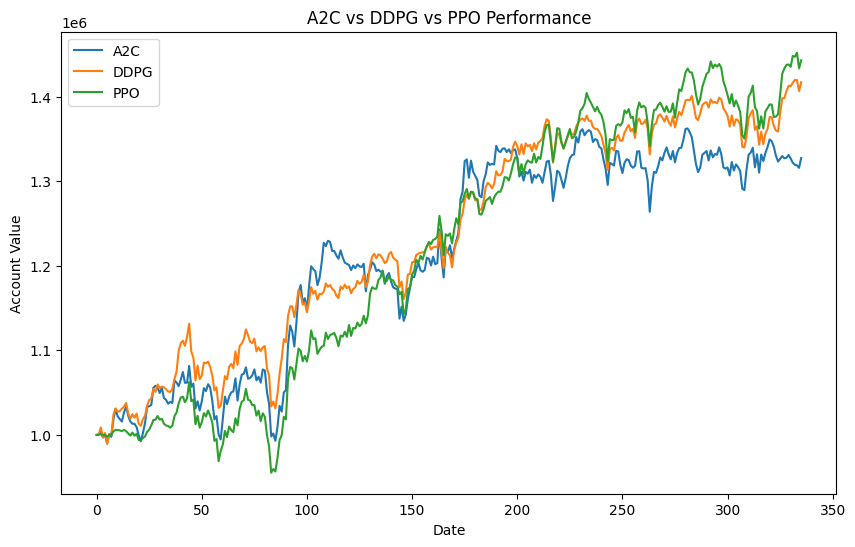

In [73]:
df_account_value_a2c['account_value']
df_account_value_ddpg['account_value']

plt.figure(figsize=(10, 6))
plt.plot(df_account_value_a2c.index, df_account_value_a2c['account_value'], label='A2C')
plt.plot(df_account_value_ddpg.index, df_account_value_ddpg['account_value'], label='DDPG')
plt.plot(df_account_value_ppo.index, df_account_value_ppo['account_value'], label='PPO')


plt.title('A2C vs DDPG vs PPO Performance')
plt.xlabel('Date')
plt.ylabel('Account Value')
plt.legend()
plt.show()


In [74]:
df_dji_ = get_baseline(ticker="^DJI", start = '2020-07-01', end = '2021-10-31')
stats = backtest_stats(df_dji_, value_col_name = 'close')
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value_a2c['date']
df_dji['account_value'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (337, 8)
Annual return          0.280495
Cumulative returns     0.391863
Annual volatility      0.138927
Sharpe ratio           1.855203
Calmar ratio           3.140767
Stability              0.918753
Max drawdown          -0.089308
Omega ratio            1.361583
Sortino ratio          2.750755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.053708
Daily value at risk   -0.016480
dtype: float64



C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [75]:
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
df_ndx_ = get_baseline(
        ticker="^NDX", 
        start = '2020-07-01',
        end = '2021-10-31')
stats = backtest_stats(df_ndx_, value_col_name = 'close')
df_ndx = pd.DataFrame()
df_ndx['date'] = df_account_value_a2c['date']
df_ndx['account_value'] = df_ndx_['close'] / df_ndx_['close'][0] * env_kwargs["initial_amount"]


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (337, 8)
Annual return          0.382426
Cumulative returns     0.541987
Annual volatility      0.207653
Sharpe ratio           1.669072
Calmar ratio           2.992635
Stability              0.929069
Max drawdown          -0.127789
Omega ratio            1.327018
Sortino ratio          2.375893
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.991286
Daily value at risk   -0.024786
dtype: float64



C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [78]:
df_ndx_ = get_baseline(
        ticker="^GSPC", 
        start = '2020-07-01',
        end = '2021-10-31')
stats = backtest_stats(df_ndx_, value_col_name = 'close')
df_ndx = pd.DataFrame()
df_ndx['date'] = df_account_value_a2c['date']
df_ndx['account_value'] = df_ndx_['close'] / df_ndx_['close'][0] * env_kwargs["initial_amount"]


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (337, 8)
Annual return          0.339331
Cumulative returns     0.478044
Annual volatility      0.142691
Sharpe ratio           2.126185
Calmar ratio           3.533061
Stability              0.958051
Max drawdown          -0.096045
Omega ratio            1.424542
Sortino ratio          3.092867
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.122242
Daily value at risk   -0.016774
dtype: float64



C:\Users\adiln\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [80]:

from ray import tune
# from ray.tune.suggest import ConcurrencyLimiter
from ray.tune.schedulers import AsyncHyperBandScheduler
# from ray.tune.suggest.optuna import OptunaSearch

def sample_ddpg_params():
  
  return {
  "buffer_size": tune.choice([int(1e4), int(1e5), int(1e6)]),
  "lr": tune.loguniform(1e-5, 1),
  "train_batch_size": tune.choice([32, 64, 128, 256, 512])
  }
def sample_a2c_params():
  
  return{
       "lambda": tune.choice([0.1,0.3,0.5,0.7,0.9,1.0]),
      "entropy_coeff": tune.loguniform(0.00000001, 0.1),
      "lr": tune.loguniform(1e-5, 1) 
      
  }

def sample_ppo_params():
  return {
      "entropy_coeff": tune.loguniform(0.00000001, 0.1),
      "lr": tune.loguniform(5e-5, 1),
      "sgd_minibatch_size": tune.choice([ 32, 64, 128, 256, 512]),
      "lambda": tune.choice([0.1,0.3,0.5,0.7,0.9,1.0])
  }